In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax

df_train = pd.read_csv('etc/notebooks/data/train.csv', sep=',')
df_test = pd.read_csv('etc/notebooks/data/test.csv', sep=',')

df = df_train.append(df_test, sort=False)

In [38]:
from sklearn.preprocessing import MaxAbsScaler

X = df[['general_female_websitescore',
        'general_male_websitescore',
        'user_no_of_sitevisits',
        'user_extract_avg_time_per_page',
        'time_extract_weekend',
        'user_avg_no_of_sitevisits_per_day']]

scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
train_data = X[:len(df_train)]
test_data = X[len(df_train):]

In [39]:
from sklearn.manifold import TSNE
n_sne = 7000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

print("training tsne..")
X_2d = tsne.fit_transform(train_data)
print("training end")

training tsne..
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3500 samples in 0.006s...
[t-SNE] Computed neighbors for 3500 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3500
[t-SNE] Computed conditional probabilities for sample 2000 / 3500
[t-SNE] Computed conditional probabilities for sample 3000 / 3500
[t-SNE] Computed conditional probabilities for sample 3500 / 3500
[t-SNE] Mean sigma: 0.054199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.218300
[t-SNE] Error after 300 iterations: 1.636977
training end


             x     y
category            
f         2401  2401
m         1099  1099


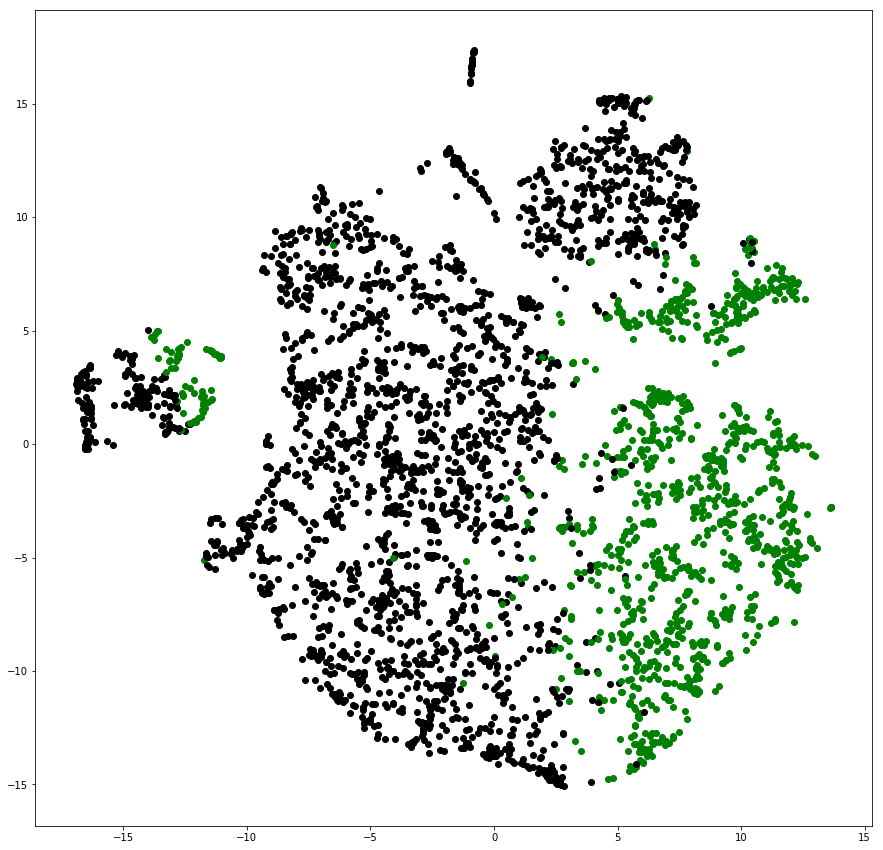

In [40]:
df = pd.DataFrame(X_2d, columns=['x', 'y'])
categories = df_train['gender'].values
df['category'] = categories
print(df.groupby('category').count())

plt.figure(figsize=(15, 15))
colormap = {'f':'black', 'm':'green'}
for i in range(len(categories)):
    plt.scatter(df.iloc[i].x,
                df.iloc[i].y,
                c=colormap[df.iloc[i].category])
plt.show()

In [41]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

y = categories
X_train, X_test, y_train, y_test = \
    train_test_split(train_data, y, train_size = 0.8)

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          f       0.97      0.99      0.98       465
          m       0.98      0.94      0.96       235

avg / total       0.97      0.97      0.97       700



In [ ]:
df_test['predicted_gender'] = clf.predict(test_data)
print(df_test[['user','predicted_gender']])
df_test[['user','predicted_gender']].to_csv('etc/csv/user_gender_predictions.csv', sep=',')